In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\hp\Project\spam.csv", encoding = 'latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
9661,ham,He needs to stop going to bed and make with th...,NaN,NaN,NaN
3766,ham,"Sir Goodmorning, Once free call me.",NaN,NaN,NaN
6208,ham,Me n him so funny...,NaN,NaN,NaN
3631,ham,Oooh I got plenty of those!,NaN,NaN,NaN
5484,ham,", , and picking them up from various points ...",NaN,NaN,NaN


In [4]:
df.shape

(11144, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11144 entries, 0 to 11143
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          11144 non-null  object
 1   v2          11144 non-null  object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 435.4+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
8620,ham,"Ok. Not much to do here though. H&M Friday, ca..."
10719,spam,Get your garden ready for summer with a FREE s...
8320,ham,Ya had just now.onion roast.
2771,ham,Then ur sis how?
7843,ham,U know we watchin at lido?


In [8]:
df.rename(columns={'v1': 'Class','v2': 'text'},inplace=True)

In [9]:
df.sample(5)

,Class,text
3756,spam,YES! The only place in town to meet exciting a...
9063,ham,Huh but i got lesson at 4 lei n i was thinkin ...
9270,spam,You are a winner you have been specially selec...
2729,spam,Urgent! Please call 09066612661 from your land...
531,ham,What Today-sunday..sunday is holiday..so no wo...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['Class'] = encoder.fit_transform(df['Class'])

In [12]:
df.head()

,Class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df['Class'] = encoder.fit_transform(df['Class'])

In [14]:
df.head()

,Class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

Class    0
text     0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(5426)

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5718, 2)

In [20]:
df.head()

,Class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['Class'].value_counts()

Class
0    4844
1     874
Name: count, dtype: int64

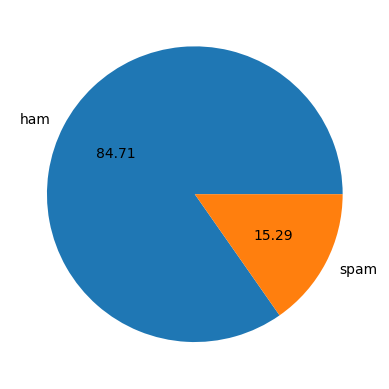

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['Class'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [23]:
import nltk

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,Class,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,Class,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,Class,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5718.000000,5718.000000,5718.000000
mean,82.263729,18.110878,1.948234
std,59.169523,13.473350,1.445813
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,65.000000,14.000000,1.000000
75%,125.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['Class'] == 0][['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,4844.000000,4844.000000,4844.000000
mean,71.973369,16.982040,1.814203
std,57.373239,13.808739,1.394273
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,54.000000,13.000000,1.000000
75%,94.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['Class'] == 1][['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,874.000000,874.000000,874.000000
mean,139.296339,24.367277,2.691076
std,28.677219,9.204381,1.500893
min,13.000000,1.000000,1.000000
25%,133.000000,18.000000,1.000000
50%,149.000000,27.000000,2.000000
75%,157.000000,31.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

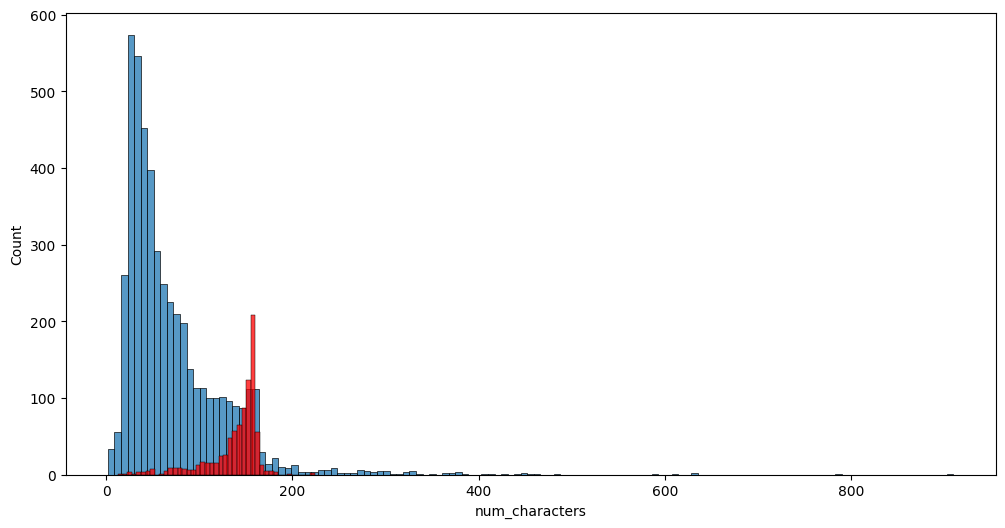

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['num_characters'])
sns.histplot(df[df['Class'] == 1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

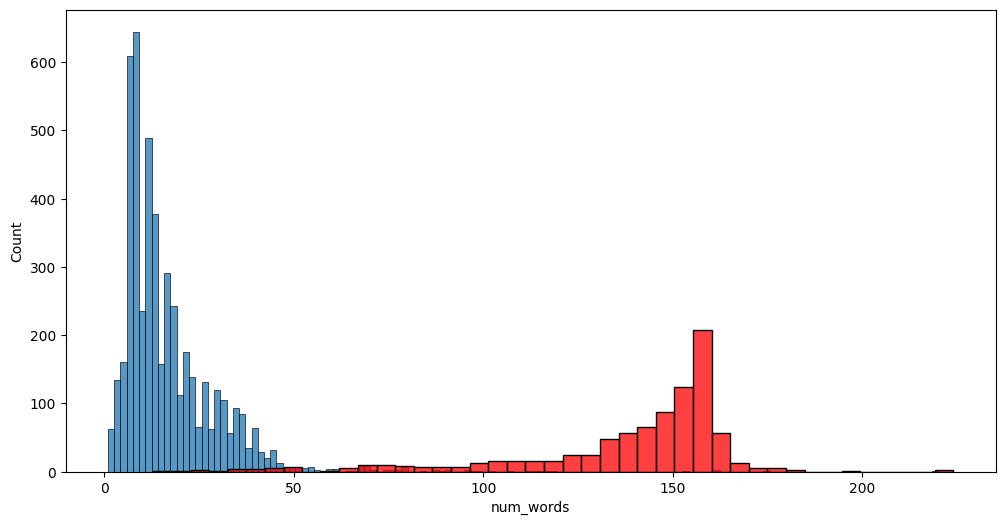

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['num_words'])
sns.histplot(df[df['Class'] == 1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

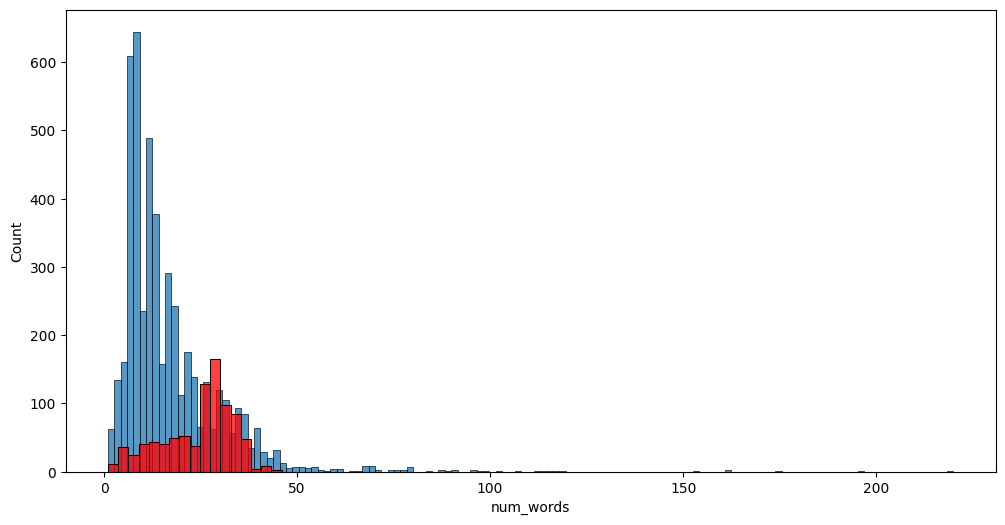

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Class'] == 0]['num_words'])
sns.histplot(df[df['Class'] == 1]['num_words'],color = 'red')

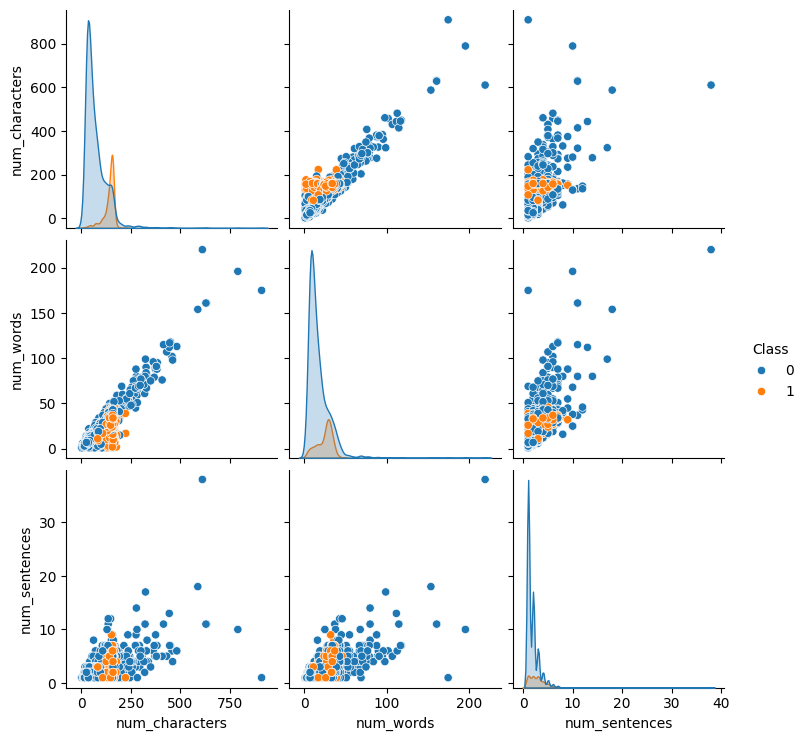

In [37]:
sns.pairplot(df,hue='Class')

<Axes: >

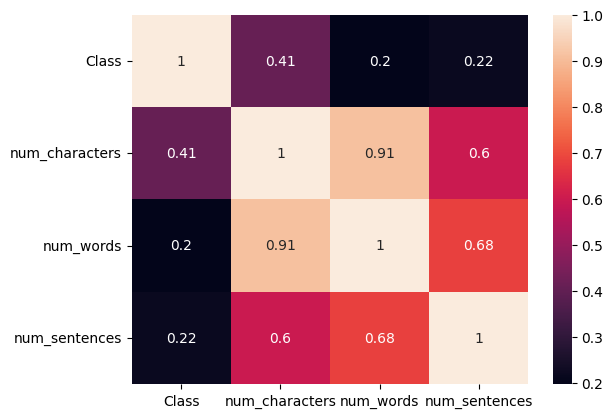

In [38]:
sns.heatmap(df.corr(numeric_only = True),annot = True)

In [39]:
import nltk
import string
string.punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [40]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [44]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [46]:
df['transformed_text'] = df['text'].apply(transform_text)

In [47]:
df.head()

,Class,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
spam_wc = wc.generate(df[df['Class']==1]['transformed_text'].str.cat(sep=" "))

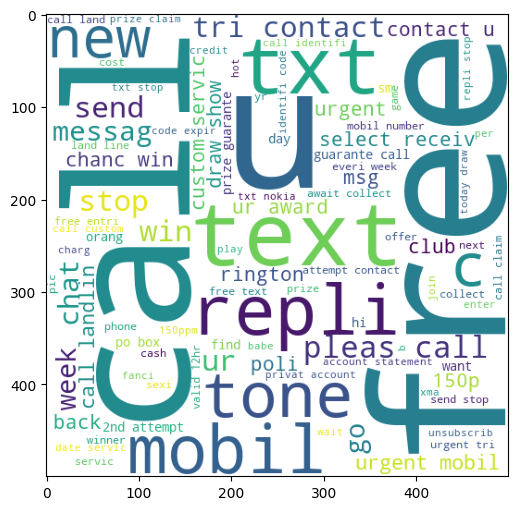

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['Class']==0]['transformed_text'].str.cat(sep=" "))

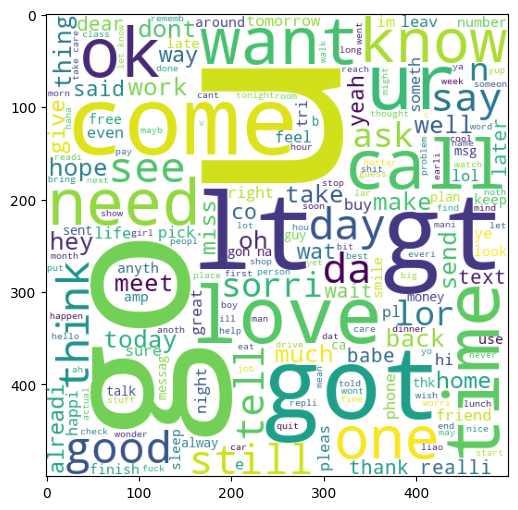

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [53]:
df.head()

,Class,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
spam_corpus = []
for msg in df[df['Class'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [55]:
len (spam_corpus)

11631

In [56]:
import seaborn as sns
from collections import Counter
data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

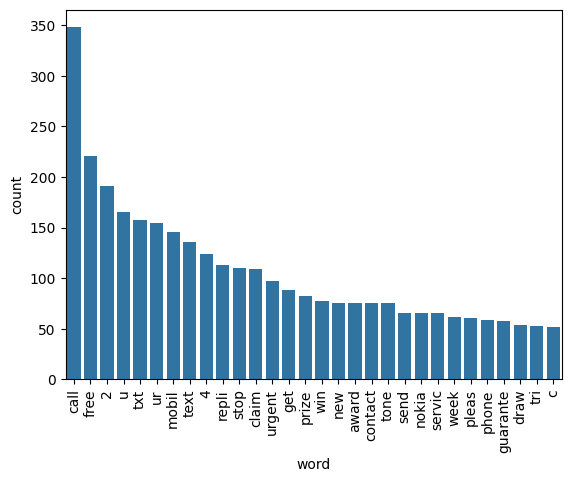

In [57]:
sns.barplot(x='word', y='count', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [58]:
ham_corpus = []
for msg in df[df['Class'] ==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [59]:
len(ham_corpus)

37779

In [60]:
import seaborn as sns
from collections import Counter
data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

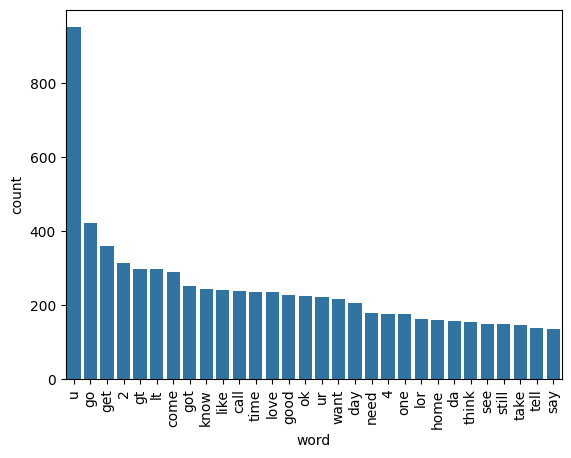

In [61]:
sns.barplot(x='word', y='count', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [63]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [64]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [65]:
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [66]:
X.shape

(5718, 3001)

In [67]:
y = df['Class'].values

In [68]:
y

array([0, 0, 1, ..., 1, 0, 0])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8784965034965035
[[833 125]
 [ 14 172]]
0.5791245791245792


In [74]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9493006993006993
[[957   1]
 [ 57 129]]
0.9923076923076923


In [75]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9685314685314685
[[955   3]
 [ 33 153]]
0.9807692307692307


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [77]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [78]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [79]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [80]:
train_classifier(svc,X_train,y_train,X_test,y_test)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.8374125874125874, np.float64(0.0))

In [81]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For  SVC
Accuracy -  0.8374125874125874
Precision -  0.0
For  KN
Accuracy -  0.8977272727272727
Precision -  0.6864864864864865
For  NB
Accuracy -  0.9493006993006993
Precision -  0.9923076923076923
For  DT
Accuracy -  0.9047202797202797
Precision -  0.8598130841121495
For  LR
Accuracy -  0.9458041958041958
Precision -  0.9025974025974026
For  RF
Accuracy -  0.972027972027972
Precision -  0.9583333333333334


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9571678321678322
Precision -  0.9101796407185628
For  BgC
Accuracy -  0.9484265734265734
Precision -  0.850828729281768
For  ETC
Accuracy -  0.9746503496503497
Precision -  0.9700598802395209
For  GBDT
Accuracy -  0.9379370629370629
Precision -  0.9389312977099237
For  xgb
Accuracy -  0.9606643356643356
Precision -  0.9272727272727272


In [82]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [83]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8784965034965035
[[833 125]
 [ 14 172]]
0.5791245791245792


In [84]:
performance_df


,Algorithm,Accuracy,Precision
2,NB,0.949301,0.992308
8,ETC,0.974650,0.970060
5,RF,0.972028,0.958333
9,GBDT,0.937937,0.938931
10,xgb,0.960664,0.927273
6,AdaBoost,0.957168,0.910180
4,LR,0.945804,0.902597
3,DT,0.904720,0.859813
7,BgC,0.948427,0.850829
1,KN,0.897727,0.686486


In [85]:
performance_df1 = pd.melt(performance_df,id_vars = "Algorithm")

In [86]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.949301
1,ETC,Accuracy,0.974650
2,RF,Accuracy,0.972028
3,GBDT,Accuracy,0.937937
4,xgb,Accuracy,0.960664
5,AdaBoost,Accuracy,0.957168
6,LR,Accuracy,0.945804
7,DT,Accuracy,0.904720
8,BgC,Accuracy,0.948427
9,KN,Accuracy,0.897727


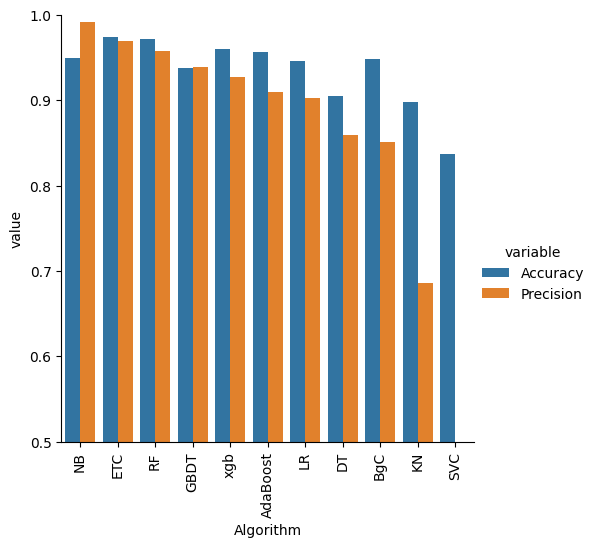

In [87]:
 sns.catplot(x = 'Algorithm', y = 'value',
             hue = 'variable', data = performance_df1, kind = 'bar',height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [88]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [90]:
new_df = performance_df.merge(temp_df,on='Algorithm')


In [91]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [92]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [93]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.949301,0.992308,0.949301,0.992308,0.949301,0.992308,0.949301,0.992308
1,ETC,0.974650,0.970060,0.974650,0.970060,0.974650,0.970060,0.974650,0.970060
2,RF,0.972028,0.958333,0.972028,0.958333,0.972028,0.958333,0.972028,0.958333
3,GBDT,0.937937,0.938931,0.937937,0.938931,0.937937,0.938931,0.937937,0.938931
4,xgb,0.960664,0.927273,0.960664,0.927273,0.960664,0.927273,0.960664,0.927273
5,AdaBoost,0.957168,0.910180,0.957168,0.910180,0.957168,0.910180,0.957168,0.910180
6,LR,0.945804,0.902597,0.945804,0.902597,0.945804,0.902597,0.945804,0.902597
7,DT,0.904720,0.859813,0.904720,0.859813,0.904720,0.859813,0.904720,0.859813
8,BgC,0.948427,0.850829,0.948427,0.850829,0.948427,0.850829,0.948427,0.850829
9,KN,0.897727,0.686486,0.897727,0.686486,0.897727,0.686486,0.897727,0.686486


In [94]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [95]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')


In [96]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [97]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9466783216783217
Precision 1.0


In [98]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [99]:
from sklearn.ensemble import StackingClassifier

In [100]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [101]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9746503496503497
Precision 0.953757225433526


In [102]:
mnb.fit(X_train,y_train)
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))